# Project B Question 2
## Model Generation for Image Classification
This model uses transer learning to generate a model for image classification using the Intel Image Classification Dataset. InceptionV3 is a keras funciton with pre-trained weigths on ImageNet. 

#### Importing Modules

In [9]:
#importing libraries
import numpy as np
import pandas as pd 
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from tensorflow import keras
import os
from tensorflow.keras import layers
from keras.layers import GlobalAveragePooling2D
from tensorflow.keras import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3,  preprocess_input
from tensorflow.keras.optimizers import SGD
from plot_keras_history import plot_history
import matplotlib.pyplot as plt

#### Train and test dataset

In [2]:
train_ds=tf.keras.preprocessing.image_dataset_from_directory(
    "../Q2B/archive/seg_train/seg_train/",
    labels="inferred",
    label_mode="int",
    color_mode="rgb",
    batch_size=32,
    image_size=(150, 150),
    shuffle=True,
)

test_ds=tf.keras.preprocessing.image_dataset_from_directory(
    "../Q2B/archive/seg_test/seg_test/",
    labels="inferred",
    label_mode="int",
    color_mode="rgb",
    batch_size=32,
    image_size=(150, 150),
    shuffle=True,
)

Found 14034 files belonging to 6 classes.
Found 3000 files belonging to 6 classes.


#### Data augmentation

In [3]:
train_datagen = ImageDataGenerator(
    rotation_range=20,  # Rotate the augmented image by 20 degrees
    zoom_range=0.3,  # Zoom by 20% more or less
    horizontal_flip=True,  # Allow for horizontal flips of augmented images
    vertical_flip=True,  # Allow for vertical flips of augmented images
    brightness_range=[0.6, 1.2],  # Lighter and darker images 
    fill_mode='nearest', 
    preprocessing_function=preprocess_input
)

In [4]:
img_data_iterator = train_datagen.flow_from_directory(
    # Where to take the data from, the classes are the sub folder names
    '../Q2B/archive/seg_train/seg_train/',
    class_mode="categorical",  # classes are in 2D one hot encoded way 
    shuffle=True,  # shuffle the data, default is true but just to point it out
    batch_size=32,
    target_size=(150, 150),  # This size is the default of mobilenet NN
)

Found 14034 images belonging to 6 classes.


#### Validation set

In [5]:
validation_generator = ImageDataGenerator(
    preprocessing_function=preprocess_input
).flow_from_directory(
    '../Q2B/archive/seg_test/seg_test/',
    class_mode="categorical",
    shuffle=True,
    batch_size=32,
    target_size=(150, 150),
)

Found 3000 images belonging to 6 classes.


#### Transfered learning
The models pre-trained weights were obtained from the inceptionV3 model, by setting weights="imagenet" we don't need to download the weights.

In [6]:
#Transfered learning, Pre-trained weights from inceptionV3
pre_trained_model = InceptionV3(input_shape = (150, 150, 3), 
                                include_top = False, 
                                weights = "imagenet")

for layer in pre_trained_model.layers:
     layer.trainable = False #Freezes layer
        
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                       

 batch_normalization_10 (BatchN  (None, 16, 16, 96)  288         ['conv2d_10[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_11 (BatchN  (None, 16, 16, 32)  96          ['conv2d_11[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_5 (Activation)      (None, 16, 16, 64)   0           ['batch_normalization_5[0][0]']  
                                                                                                  
 activation_7 (Activation)      (None, 16, 16, 64)   0           ['batch_normalization_7[0][0]']  
                                                                                                  
 activatio

 conv2d_20 (Conv2D)             (None, 16, 16, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_23 (Conv2D)             (None, 16, 16, 96)   55296       ['activation_22[0][0]']          
                                                                                                  
 batch_normalization_20 (BatchN  (None, 16, 16, 48)  144         ['conv2d_20[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_23 (BatchN  (None, 16, 16, 96)  288         ['conv2d_23[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activatio

                                                                                                  
 conv2d_34 (Conv2D)             (None, 7, 7, 128)    98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_34 (BatchN  (None, 7, 7, 128)   384         ['conv2d_34[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_34 (Activation)     (None, 7, 7, 128)    0           ['batch_normalization_34[0][0]'] 
                                                                                                  
 conv2d_35 (Conv2D)             (None, 7, 7, 128)    114688      ['activation_34[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 activation_44 (Activation)     (None, 7, 7, 160)    0           ['batch_normalization_44[0][0]'] 
                                                                                                  
 conv2d_45 (Conv2D)             (None, 7, 7, 160)    179200      ['activation_44[0][0]']          
                                                                                                  
 batch_normalization_45 (BatchN  (None, 7, 7, 160)   480         ['conv2d_45[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_45 (Activation)     (None, 7, 7, 160)    0           ['batch_normalization_45[0][0]'] 
                                                                                                  
 conv2d_41

 batch_normalization_55 (BatchN  (None, 7, 7, 160)   480         ['conv2d_55[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_55 (Activation)     (None, 7, 7, 160)    0           ['batch_normalization_55[0][0]'] 
                                                                                                  
 conv2d_51 (Conv2D)             (None, 7, 7, 160)    122880      ['mixed5[0][0]']                 
                                                                                                  
 conv2d_56 (Conv2D)             (None, 7, 7, 160)    179200      ['activation_55[0][0]']          
                                                                                                  
 batch_normalization_51 (BatchN  (None, 7, 7, 160)   480         ['conv2d_51[0][0]']              
 ormalizat

 conv2d_61 (Conv2D)             (None, 7, 7, 192)    147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_66 (Conv2D)             (None, 7, 7, 192)    258048      ['activation_65[0][0]']          
                                                                                                  
 batch_normalization_61 (BatchN  (None, 7, 7, 192)   576         ['conv2d_61[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_66 (BatchN  (None, 7, 7, 192)   576         ['conv2d_66[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activatio

 ormalization)                                                                                    
                                                                                                  
 batch_normalization_74 (BatchN  (None, 7, 7, 192)   576         ['conv2d_74[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_70 (Activation)     (None, 7, 7, 192)    0           ['batch_normalization_70[0][0]'] 
                                                                                                  
 activation_74 (Activation)     (None, 7, 7, 192)    0           ['batch_normalization_74[0][0]'] 
                                                                                                  
 conv2d_71 (Conv2D)             (None, 3, 3, 320)    552960      ['activation_70[0][0]']          
          

                                                                                                  
 activation_82 (Activation)     (None, 3, 3, 384)    0           ['batch_normalization_82[0][0]'] 
                                                                                                  
 activation_83 (Activation)     (None, 3, 3, 384)    0           ['batch_normalization_83[0][0]'] 
                                                                                                  
 batch_normalization_84 (BatchN  (None, 3, 3, 192)   576         ['conv2d_84[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_76 (Activation)     (None, 3, 3, 320)    0           ['batch_normalization_76[0][0]'] 
                                                                                                  
 mixed9_0 

 ormalization)                                                                                    
                                                                                                  
 activation_85 (Activation)     (None, 3, 3, 320)    0           ['batch_normalization_85[0][0]'] 
                                                                                                  
 mixed9_1 (Concatenate)         (None, 3, 3, 768)    0           ['activation_87[0][0]',          
                                                                  'activation_88[0][0]']          
                                                                                                  
 concatenate_1 (Concatenate)    (None, 3, 3, 768)    0           ['activation_91[0][0]',          
                                                                  'activation_92[0][0]']          
                                                                                                  
 activatio

#### Model Architecture
+ First layer flattens the last layer from the pre-trained model.
+ Second layer make all the neurons receive their input from previous neurons, creating a connected layer.
+ Third layer reduces overfitting by removing noise in neurons.
+ Fourth layer is similar to the second layer, only changing the number of neurons connected and the act. function.

Callback will earlystop the model fit.
The models optimizer is Stochastic gradient descent (SGD) with a default learning rate of 0.01.



In [12]:
#Model and Architecture
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer : output shape: ', last_layer.output_shape)
last_output = last_layer.output 


#Architecture can be modified to try to improve the model
x = layers.Flatten()(last_output)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.35)(x)                  
x = layers.Dense(6, activation='softmax')(x)     

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3) 

model = Model(pre_trained_model.input, x) 

model.compile(optimizer = "SGD", 
              loss = 'categorical_crossentropy', 
              metrics = ['acc'])

history=model.fit(img_data_iterator,epochs=60, callbacks=[callback], validation_data=validation_generator)

last layer : output shape:  (None, 7, 7, 768)
Epoch 1/60
439/439 [==============================] - 205s 462ms/step - loss: 0.5458 - acc: 0.7985 - val_loss: 0.3205 - val_acc: 0.8780
Epoch 2/60
439/439 [==============================] - 207s 471ms/step - loss: 0.3893 - acc: 0.8603 - val_loss: 0.3099 - val_acc: 0.8857
Epoch 3/60
439/439 [==============================] - 203s 461ms/step - loss: 0.3517 - acc: 0.8719 - val_loss: 0.2736 - val_acc: 0.8960
Epoch 4/60
439/439 [==============================] - 202s 460ms/step - loss: 0.3299 - acc: 0.8786 - val_loss: 0.2746 - val_acc: 0.8967
Epoch 5/60
439/439 [==============================] - 203s 462ms/step - loss: 0.3164 - acc: 0.8819 - val_loss: 0.2464 - val_acc: 0.9050
Epoch 6/60
439/439 [==============================] - 204s 466ms/step - loss: 0.3072 - acc: 0.8868 - val_loss: 0.2480 - val_acc: 0.9083
Epoch 7/60
439/439 [==============================] - 205s 467ms/step - loss: 0.2997 - acc: 0.8903 - val_loss: 0.2689 - val_acc: 0.9027
Ep

#### Loss vs Epochs, Accuracy vs Epoch
This graphs are from the model saved as model_92.h5

[(<Figure size 360x360 with 1 Axes>, <Figure size 360x360 with 1 Axes>),
 (<AxesSubplot:title={'center':'Loss'}, xlabel='Epochs', ylabel='Loss'>,
  <AxesSubplot:title={'center':'Accuracy'}, xlabel='Epochs', ylabel='Accuracy'>)]

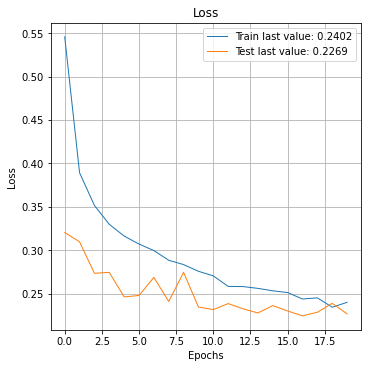

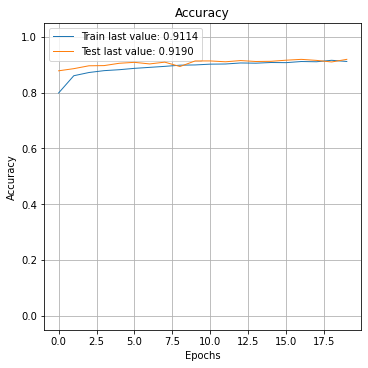

In [13]:
plot_history(history, single_graphs=True)


#### Fine-tuning
Layeres were freezed to avoid loosing information in the training phase, by unfreezing them we can let the model improve if we train it with new datasets, we must lower the learning rate to avoid overfitting.

In [17]:
for layer in pre_trained_model.layers:
     layer.trainable = True #Unfreezes layer
    
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2) 

model.compile(optimizer =keras.optimizers.SGD(0.0001),  #Slow learning rate
              loss = 'categorical_crossentropy', 
              metrics = ['acc'])

history=model.fit(img_data_iterator,epochs=65, callbacks=[callback], validation_data=validation_img_data_iterator)

Epoch 1/65
439/439 [==============================] - 1044s 2s/step - loss: 0.7314 - acc: 0.7420 - val_loss: 0.4564 - val_acc: 0.8500
Epoch 2/65
439/439 [==============================] - 1009s 2s/step - loss: 0.6113 - acc: 0.7986 - val_loss: 0.4163 - val_acc: 0.8640
Epoch 3/65
439/439 [==============================] - 1029s 2s/step - loss: 0.5744 - acc: 0.8096 - val_loss: 0.3918 - val_acc: 0.8690
Epoch 4/65
439/439 [==============================] - 1039s 2s/step - loss: 0.5383 - acc: 0.8185 - val_loss: 0.3769 - val_acc: 0.8710
Epoch 5/65
439/439 [==============================] - 1032s 2s/step - loss: 0.5287 - acc: 0.8219 - val_loss: 0.3648 - val_acc: 0.8733
Epoch 6/65
439/439 [==============================] - 2757s 6s/step - loss: 0.5093 - acc: 0.8245 - val_loss: 0.3561 - val_acc: 0.8757
Epoch 7/65
439/439 [==============================] - 1002s 2s/step - loss: 0.4977 - acc: 0.8277 - val_loss: 0.3425 - val_acc: 0.8783
Epoch 8/65
439/439 [==============================] - 1000s 2s

In [14]:
#Save the model
model.save('model_92.h5')